In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.rename(columns = {iris.columns[0]: 'SL',
                      iris.columns[1]: 'SW',
                      iris.columns[2]: 'PL',
                      iris.columns[3]: 'PW',
                      iris.columns[4]: 'Y',}, inplace = True)
iris.head()

,SL,SW,PL,PW,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
st = iris.groupby(iris.Y).mean()
st.columns.name = '변수'
st

변수,SL,SW,PL,PW
Y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


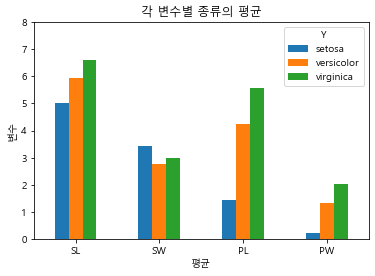

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

st.T.plot.bar(rot=0) # rot : x축 변수명의 기울기
plt.title("각 변수별 종류의 평균")
plt.xlabel("평균")
plt.ylabel("변수")
plt.ylim(0,8)
plt.show()

In [6]:
iris2 = iris
def encoding(x):
    if x == 'setosa':
        x = 1
    elif x == 'virginica':
        x = 3
    else:
        x = 2
    return x
iris2['Y'] = iris2['Y'].apply(encoding)
iris2

,SL,SW,PL,PW,Y
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [1]:
from sklearn.model_selection import train_test_split
 
x = iris2[['SL', 'SW', 'PL', 'PW']]
y = iris2['Y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    

result = []
for tree in range(10,110,10):   # 학습 진행
    forest = RandomForestClassifier(n_estimators=tree, max_depth = 20)
    forest.fit(x_train, y_train)
 
        # 예측
    y_pred = forest.predict(x_test)

        # 정확도 확인
    result.append(metrics.accuracy_score(y_test, y_pred))

plt.plot([i for i in range(10,110,10)], result)
plt.xlabel('estimators num')
plt.ylabel('acc')
plt.title('fuck')
plt.show()

print("특성 중요도 : \n{}".format(forest.feature_importances_))

def plot_feature_importances_cancer(model):

    n_features = 4
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris2.columns)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances_cancer(forest)

NameError: name 'iris2' is not defined

In [21]:
iris2.columns

Index(['SL', 'SW', 'PL', 'PW', 'Y'], dtype='object')

In [77]:
for key, group in a:
    print('*key :', key)
    print('*number :', len(group))
    print(group.head())

*key : 1
*number : 50
    SL   SW   PL   PW  Y
0  5.1  3.5  1.4  0.2  1
1  4.9  3.0  1.4  0.2  1
2  4.7  3.2  1.3  0.2  1
3  4.6  3.1  1.5  0.2  1
4  5.0  3.6  1.4  0.2  1
*key : 2
*number : 50
     SL   SW   PL   PW  Y
50  7.0  3.2  4.7  1.4  2
51  6.4  3.2  4.5  1.5  2
52  6.9  3.1  4.9  1.5  2
53  5.5  2.3  4.0  1.3  2
54  6.5  2.8  4.6  1.5  2
*key : 3
*number : 50
      SL   SW   PL   PW  Y
100  6.3  3.3  6.0  2.5  3
101  5.8  2.7  5.1  1.9  3
102  7.1  3.0  5.9  2.1  3
103  6.3  2.9  5.6  1.8  3
104  6.5  3.0  5.8  2.2  3


In [3]:
# pca 분석 사용해보기
pca_data = iris
pca_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# 데이터 분산량에 따라 pca에 미치는 영향이 큼으로 표준화해줌

from sklearn.preprocessing import StandardScaler
x = pca_data.drop(['species'], axis=1).values # 독립변인들의 value값만 추출
y = pca_data['species'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [27]:
# PCA 진행
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

finalDf = pd.concat([principalDf, iris.species], axis=1)
finalDf.head()
# pca.explained_variance_ratio_ -> 각 주성분이 가지고 있는 분산 sum(pca.explained_variance_ratio_) 하면 pca 데이터 분산량의 합

,principal component1,principal component2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


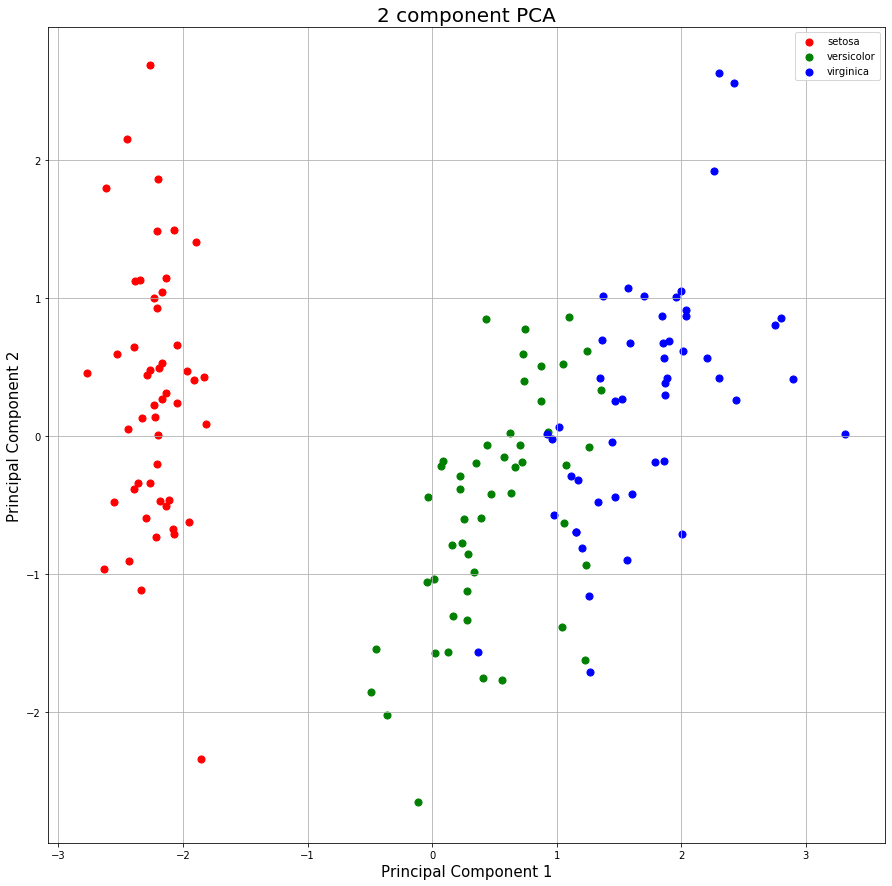

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
# 주성분 1개일때의 분산량
from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1'])

pca.explained_variance_ratio_ # -> 각 주성분이 가지고 있는 분산 sum(pca.explained_variance_ratio_) 하면 pca 데이터 분산량의 합

array([0.72962445])